In [5]:
import numpy as np

import random

import matplotlib.pyplot as plt

from matplotlib.ticker import MultipleLocator, FormatStrFormatter

import copy


# Environment: Grids Worlds

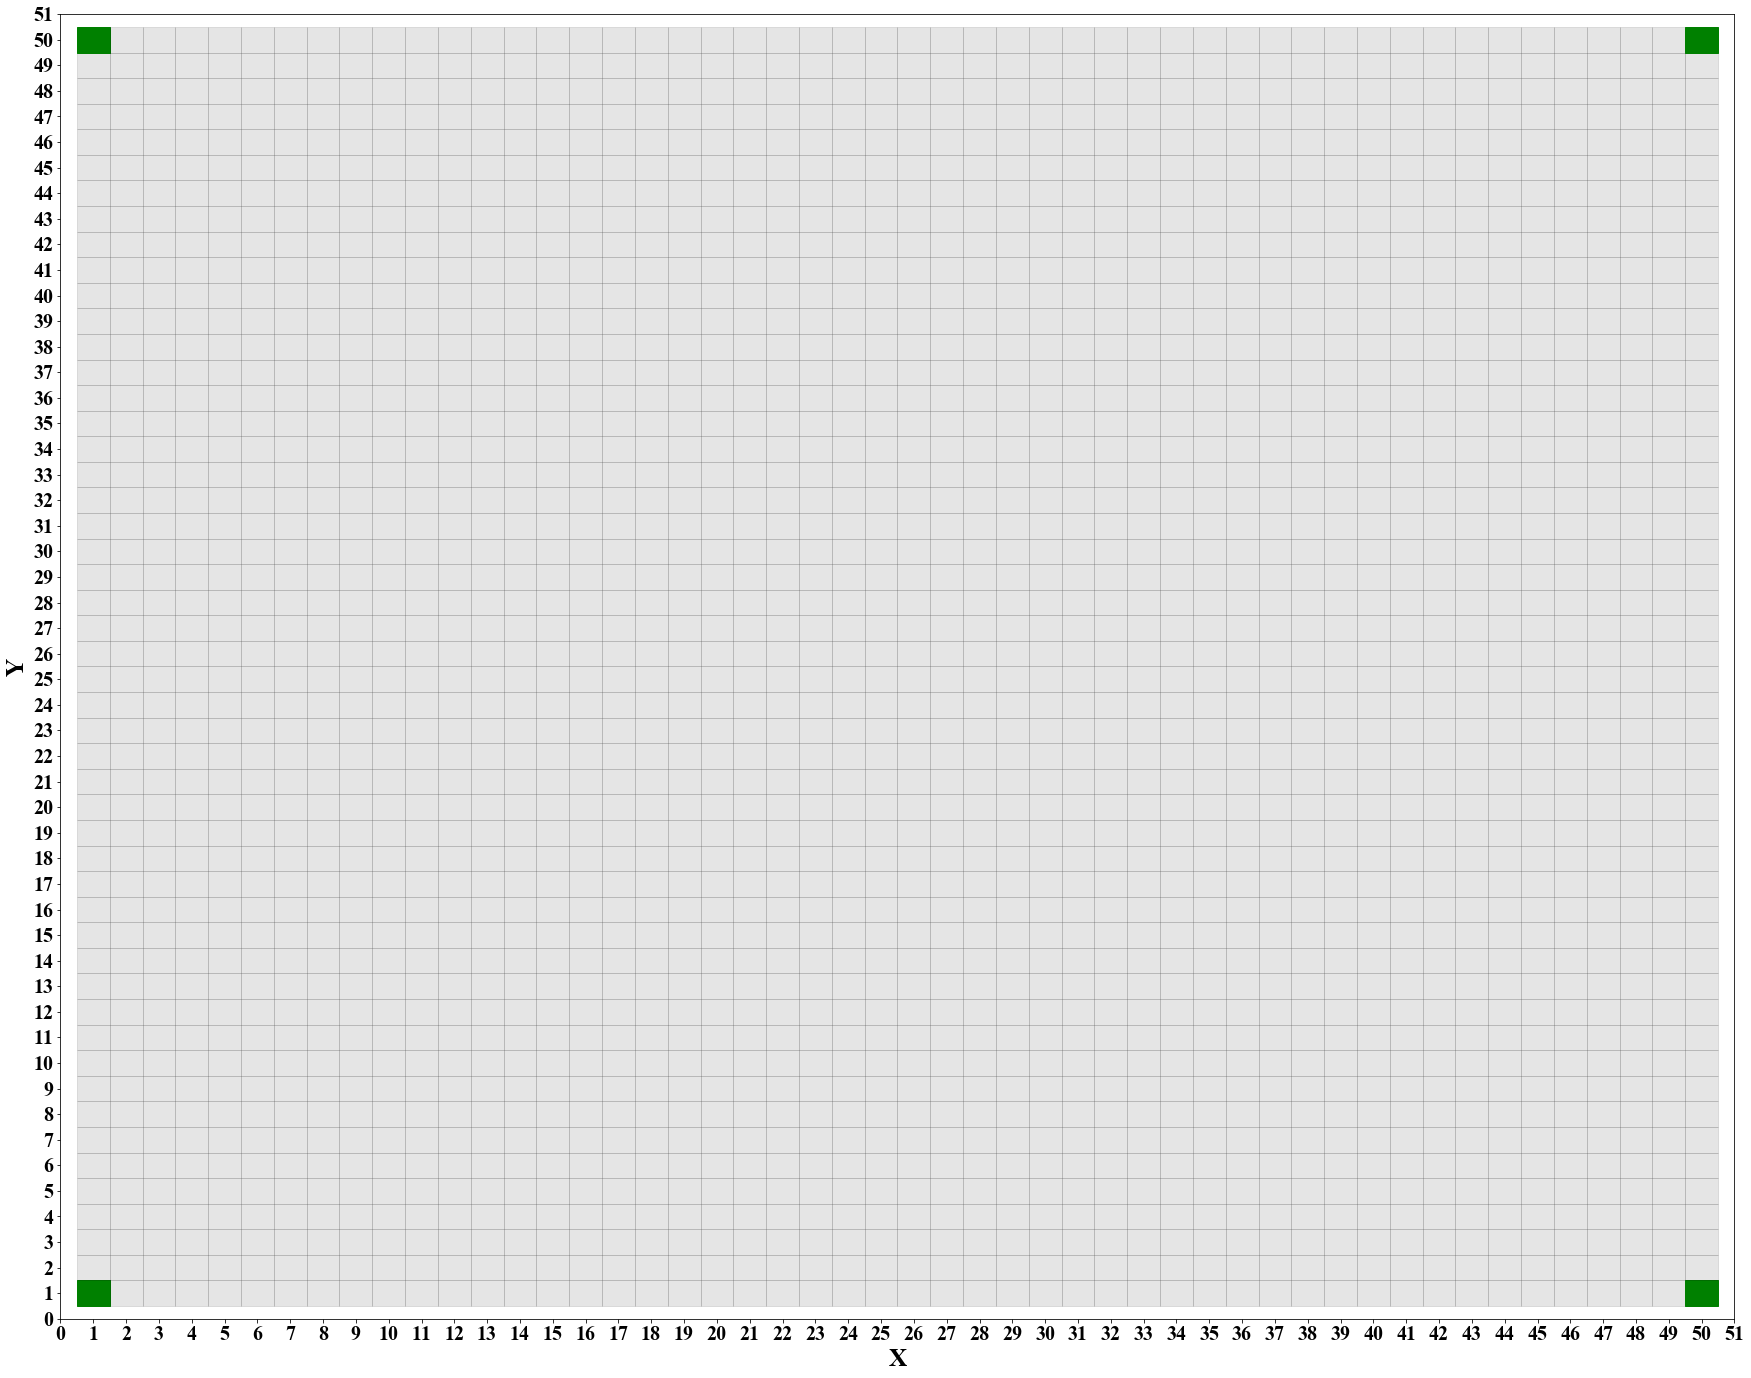

In [11]:
'''State'''

X_coordinate=list(range(1,51,1))

Y_coordinate=list(range(1,51,1))

State=list()

for x in X_coordinate:
    for y in Y_coordinate:
        state=(x,y)
        State.append(state)
        
'''Action'''

Action={state:[(-1,0),(1,0),(0,1),(0,-1),(0,0)] for state in State}

for state in State:
    
    X_=state[0];Y_=state[1];
    
    if X_==1:
        
        Action[state].remove((-1,0))
        
    elif X_==50:
        
        Action[state].remove((1,0))
        
    if Y_==1:
        
        Action[state].remove((0,-1))
        
    elif Y_==50:
        
        Action[state].remove((0,1))


'''Terminate state'''

S_t=[(1,1),(1,50),(50,1),(50,50)]


'''Reward'''

Get_state= lambda s,a: (s[0]+a[0],s[1]+a[1])

Reward={s:{a: 0 if Get_state(s,a) not in S_t else 1 for a in actions} for s,actions in Action.items()}


'''Visualization'''

def Background():
    
    figsize = 30,24

    font_label = {'family' : 'Times New Roman','weight' : 'normal','size': 25}

    font_legend = {'family' : 'Times New Roman','weight' : 'normal','size': 20}


    figure, ax1 = plt.subplots(figsize=figsize)

    labels = ax1.get_xticklabels() + ax1.get_yticklabels()

    [label.set_fontsize(20) for label in labels]

    [label.set_fontname('Times New Roman') for label in labels]

    ax1.set_ylabel('Y',font_label)

    ax1.set_xlabel('X',font_label)


    ax1.set_xlim([0,51])

    ax1.set_ylim([0,51])

    for state in State:

        loc=(state[0]-0.5,state[1]-0.5)

        if state in S_t:

            ax1.add_patch(plt.Rectangle(loc,1,1,color='green', alpha=1))

        else:

            ax1.add_patch(plt.Rectangle(loc,1,1,color='black', alpha=0.1))


    majorLocator   = MultipleLocator(1)

    ax1.yaxis.set_major_locator(majorLocator) 

    ax1.xaxis.set_major_locator(majorLocator)
    
    return figure, ax1


figure, ax1=Background()


In [14]:
'''Generate an Episode'''

def Generate_Episode(State,Action,Reward):
    
    Episodes=list()
    
    ini_state=random.choice(State)
    
    ini_action=random.choice(Action[ini_state])
    
    ini_reward=Reward[ini_state][ini_action]
    
    Episodes.append((ini_state,ini_action,ini_reward))
    
    next_state=Get_state(ini_state,ini_action)
    
    while next_state not in S_t:
        
        ini_state=random.choice(State)
    
        ini_action=random.choice(Action[ini_state])
    
        ini_reward=Reward[ini_state][ini_action]

        Episodes.append((ini_state,ini_action,ini_reward))
    
        next_state=Get_state(ini_state,ini_action)
        
    return Episodes
    

## Introduction

In this post, we will use model-free prediction to estimate the value function of an unknown MDP. i.e We will look at policy evaluation of an unknown MDP.

The three main methods that will be explained for model-free predictions are: 

**1. Monte-Carlo Learning**


**2. Temporal-Difference Learning**


**3. TD(λ)**

## Monte-Carlo Learning

Monte Carlo methods are model-free which learn directly from episodes of experience. 

Monte Carlo learns from **complete episodes** with **no bootstrapping**. 

***Notes: Bootstrapping is any test or metric that uses random sampling with replacement, and falls under the broader class of resampling methods. Bootstrapping assigns measures of accuracy (bias, variance, confidence intervals, prediction error, etc.) to sample estimates.***


One drawback to MC is that it can only apply to episodic Markov Decision Processes **where all episodes must terminate**.


### Monte-Carlo Policy Evaluation

**Goal**: Given a policy $\pi$, learn $V_{\pi}$ (value for the policy) from episodes of experience.

\begin{equation}
S_{1},A_{1},R_{2},...,S_{k} \sim \pi
\end{equation}

Monte-Carlo policy evaluation uses empirical mean return instead of expected return. 


Two approaches to evaluate the value function of a policy at a state is to use：

**1. First-Visit Monte-Carlo Policy Evaluation.**

**2. Every-Visit Monte-Carlo Policy Evaluation.**


### First-Visit Monte-Carlo Policy Evaluation

(1) Evaluate the value of state $s$ of a given policy


(2) The first time-step ($t$) that state ($s$) is visited in an episode.


(3) Increment counter: $N(s) \leftarrow N(s) + 1$

(4) Increment total return: $S(s) \leftarrow S(s) + G$

(5) Value is estimated by mean return: $V(s) =\frac{S(s)}{N(s)}$

(6) $V(s) → V_{\pi}(s)$ as $N(s) → \infty$


In [16]:
'''First-Visit Monte-Carlo Policy Evaluation'''


'''

Tomorrow: 

1. How to calculate Gain?

2. Implement First-Visit Monte-Carlo Policy Evaluation

'''

